# Лекция 2. Векторы, матрицы и нормы. Устойчивость алгоритмов и унитарные матрицы

## Что обсудили в прошлый раз

- Форматы представления чисел в компьютере
- Нюансы вычислений с числами в формате плавающей точки
- Накопление ошибок в процессе вычислений
- Алгоритмы суммирования
- Влияние форматов хранения чисел на работу с нейросетями 

## План на сегодня

- Векторы и что с ними можно делать
- Матрицы и что можно делать с ними
- Базовые операции - введение
- Устойчивость алгоритмов: прямая vs обратная
- Нормы для векторов и матриц: как определить, вычислить и где применяются 

## Векторы

- В рамках курса, мы будем работать не с числами, а с векторами
- Вектор в фиксированном базисе размера $n$ может быть представлен как одномерный массив из $n$ чисел.
- Обычно вектор рассматривается, как матрица $n \times 1$, то есть вектор-столбец

**Примеры:** 
- Многочлены степени $\leq n$ образуют линейное пространство.
- Многочлен $ x^3 - 2x^2 + 1$ может быть представлен в виду вектора $\begin{bmatrix}1 \\ -2 \\ 0 \\ 1\end{bmatrix}$ в базисе $\{x^3, x^2, x, 1\}$

In [6]:
import numpy as np

n = 10
xr = np.array(np.random.randn(n), dtype=np.float64, )
print(xr)
x = np.ones(n)
print(x)
x = np.zeros(n)
print(x)
x = np.zeros_like(xr)
print(x)

[-1.05832754  0.69583904 -1.53083165 -0.58491127 -0.7883133   0.02687101
  0.50470021  2.71925914 -0.58663484 -0.69876475]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [78]:
from numba import jit
from numba.typed import List

def naive_scal(x, y):
    val = 0
    for i in range(len(x)):
        val += x[i] * y[i]
    return val


@jit(nopython=True)
def naive_scal_numba(x, y):
    val = 0
    for i in range(len(x)):
        val += x[i] * y[i]
    return val

import random
n = 1000
x = [random.random() for i in range(n)]
y = [random.random() for i in range(n)]
typed_x = List()
typed_y = List()
[typed_x.append(xi) for xi in x]
[typed_y.append(x) for x in y]
%timeit naive_scal(x, y)
%timeit naive_scal_numba(typed_x, typed_y)
xnp = np.array(x)
ynp = np.array(y)
%timeit xnp @ ynp

63.1 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
26.5 µs ± 33.1 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.16 µs ± 0.583 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Векторные нормы

- Векторы обычно содержат приближённое описание физических или каких-нибудь других объектов

- Один из главных вопросов – это насколько приближение точное (1%, 10%)

- Что является достаточно точным представлением объектов, конечно, зависит от конкретного приложения. Например:
    - При решении уравнений в частных производных чаще всего встречается точность порядка $10^{-5} - 10^{-10}$
    - Текущие приложений нейросетей к решению уравнений в частных производных часто дают точность $10^{-3} - 10^{-4}$. Графики ниже из [этой](https://arxiv.org/pdf/2006.11894.pdf) работы
    <img src="pinns_loss.png">
    - В приложениях, связанных с обработкой данных, иногда точность порядка $80\%$ приемлема при серьёзном зашумлении исходных данных.

## Расстояния и нормы

- Норма – это количественная мера малости вектора, обычно обознается как $\Vert x \Vert$.

Норма должна удовлетворять следующим свойствам:

- $\Vert \alpha x \Vert = |\alpha| \Vert x \Vert$
- $\Vert x + y \Vert \leq \Vert x \Vert + \Vert y \Vert$ (неравенство треугольника)
- Если $\Vert x \Vert = 0$, то $x = 0$

Расстояние между двумя векторами можно определить как норму разности между ними

$$
   d(x, y) = \Vert x - y \Vert.
$$

## Стандартные нормы

Наиболее известная и чаще всего используемая норма – это **евклидова норма**:

$$\Vert x \Vert_2 = \sqrt{\sum_{i=1}^n |x_i|^2},$$

расстояние по которой соответствует расстоянию в реальном мире. Если векторы состоят из комплексных чисел, используются их модули.

## $p$-норма

Евклидова норма или $2$-норма – это частный случай важного класса $p$-норм:

$$
 \Vert x \Vert_p = \Big(\sum_{i=1}^n |x_i|^p\Big)^{1/p}.
$$

Также важны следующие два частных случая :
- Бесконечная норма или Чебышёвская норма определяется как максимальный модуль элемента вектора $x$: 

$$
\Vert x \Vert_{\infty} = \max_i | x_i|
$$

<img src="chebyshev.jpeg" style="height">

- $L_1$ норма определяется как сумма модулей элементов вектора $x$: 

$$
\Vert x \Vert_1 = \sum_i |x_i|
$$

Расстояние, определённое как $L_1$ норма разности между векторами, называется **Манхэттенским расстоянием**

<img src="manhattan.jpeg" style="height">  


## Эквивалентность норм

Все нормы эквивалентны в следующем смысле

$$
   C_1 \Vert x \Vert_* \leq  \Vert x \Vert_{**} \leq C_2 \Vert x \Vert_*
$$  

для некоторых положительных констант $C_1(n), C_2(n)$, $x \in \mathbb{R}^n$ для любых пар норм $\Vert \cdot \Vert_*$ и $\Vert \cdot \Vert_{**}$. Эквивалентность норм означает, что если некоторый вектор мал в одной норме, то он мал и в другой норме. Однако константы могут быть большими.

## Вычисление норм в Python

Пакет NumPy содержит всё необходимое для вычисления норм: функция ```np.linalg.norm```.


In [16]:
import numpy as np
n = 100
a = np.ones(n)
b = a + 1e-3 * np.random.randn(n)
print('Relative error in L1 norm:', np.linalg.norm(a - b, 1) / np.linalg.norm(b, 1))
print('Relative error in L2 norm:', np.linalg.norm(a - b) / np.linalg.norm(b))
print('Relative error in Chebyshev norm:', np.linalg.norm(a - b, np.inf) / np.linalg.norm(b, np.inf))

Relative error in L1 norm: 0.0007956431743793441
Relative error in L2 norm: 0.000986473236799014
Relative error in Chebyshev norm: 0.0026489905361136838


## Единичные диски в различных нормах

- Единичный диск – это множество точек такое что $\Vert x \Vert \leq 1$
- Для евклидовой нормы единичный диск сопадает с обычным диском
- Для других норм единичный диск сильно отличается от привычного нам диска

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=inf$')

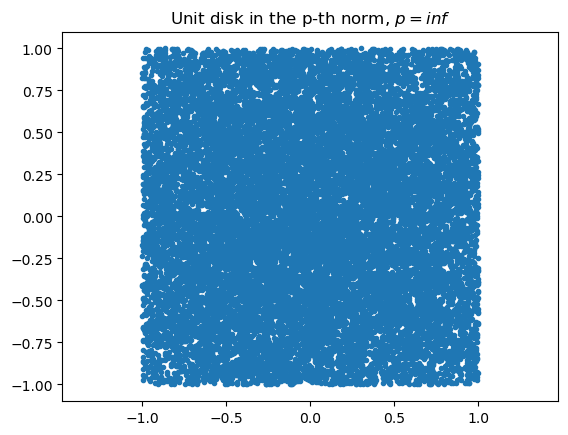

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
p = np.inf # Which norm do we use
M = 40000 # Number of sampling points
a = np.random.randn(M, 2)
b = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = np.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

## Почему $L_1$ норма может быть важна?

$L_1$ норма играет важную роль в задаче **compressed sensing**. 

Простейшая формулировка этой задачи следующая:

- Даны некоторые наблюдения $f$ 
- Известно, что модель получения наблюдений линейная $Ax = f$, где $A$ – это $n \times m$ известная матрица
- Число уравнений $n$ меньше, чем число неизвестных $m$

**Q**: можем ли мы найти решение такой системы?

Решение, очевидно, не единственно, поэтому естественный подход – это искать решение минимальное в некотором смысле:

\begin{align*}
& \Vert x \Vert \rightarrow \min_x \\
\mbox{subject to } & Ax = f
\end{align*}

- Выбор стандартной евклидовой нормы $\Vert x \Vert = \Vert x \Vert_2$ приводит к **линейной задаче наименьших квадратов**  

- Выбор первой нормы $\Vert x \Vert = \Vert x \Vert_1$ приводит к задаче [**compressed sensing**](https://en.wikipedia.org/wiki/Compressed_sensing)
- Обычно решение этой задачи является наиболее **разреженным** (sparse) решением данной системы 

### Условие RIP

- s-restricted isometry property (RIP) выполнено для матрицы $A \in \mathbb{R}^{m \times n}$, если существует $\delta_s \in (0, 1)$ такая что для любой подматрицы $A_s \in \mathbb{R}^{m \times s}$ выполнено

$$ (1 - \delta_s)\|y\|_2^2 \leq \|A_s y\|_2^2 \leq (1 + \delta_s) \|y\|_2^2  $$

- Показано, что с высокой вероятностью такое условие выполнено для случайных матриц

- Связь между RIP-условием и решением задачи минимизации $\ell_1$-нормы показана [тут](https://onlinelibrary.wiley.com/doi/abs/10.1002/cpa.20124?casa_token=Oi_lDpUt4nYAAAAA:IPceNxxhCcFEth6EuuDJO-YVfg5xJmT4xUmTLZDkoL02aYzg2SMcAV13dJAkA11WWw3xmThkoYcHZGlr)

## Что такое устойчивый алгоритм?

Введём понятия **устойчивости** алгоритма.

- Пусть $x$ некоторый объект, с которым производят операции (например, вектор)
- Пусть $f(x)$ функция от этого объекта, которую необходимо вычислить 

Также имеется **вычислительный алгоритм** ``alg(x)``, который вычисляет некоторую аппроксимацию функции $f(x)$.  

Будем называть алгоритм **forward stable**, если 

$$\Vert alg(x) - f(x) \Vert  \leq \varepsilon $$  

Будем называть алгоритм **backward stable**, если для любого $x$ найдётся близкий вектор $x + \delta x$ такой что

$$alg(x) = f(x + \delta x)$$

и $\Vert \delta x \Vert$ мало.

## Классический пример

Классическим примером для демонстрации (не)устойчивости алгоритма является задача решения системы линейных уравнений с помощью метода Гаусса, который связан с вычислением LU разложения матрицы (подробности будут далее).

Рассмотрим **матрицу Гильберта** с элементами

$$A = \{a_{ij}\}, \quad a_{ij} = \frac{1}{i + j + 1}, \quad i,j = 0, \ldots, n-1.$$

и соответствующую линейную систему с этой матрицей

$$Ax = f.$$

In [25]:
import numpy as np
n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)] # Hilbert matrix
A = np.array(a)
rhs =  np.random.random(n)
sol = np.linalg.solve(A, rhs)
print(np.linalg.norm(A.dot(sol) - rhs)/np.linalg.norm(rhs))
#plt.plot(sol)

15.469887864248868


In [26]:
rhs =  np.ones(n)
sol = np.linalg.solve(A, rhs)
print(np.linalg.norm(A.dot(sol) - rhs)/np.linalg.norm(rhs))
#plt.plot(sol)

1.4706170310348663e-07


## Другие примеры неустойчивости

Какой вычислительно устойчивый способ вычисления следующих функций?

- $\log(1 - \tanh^2(x))$
- $SoftMax(x)_j = \dfrac{e^{x_j}}{\sum\limits_{i=1}^n e^{x_i}}$  

In [27]:
u = 300
eps = 1e-6
print("Original function:", np.log(1 - np.tanh(u)**2))
eps_add = np.log(1 - np.tanh(u)**2 + eps)
print("Attempt imporove stability with add small constant:", eps_add)
print("Use more numerically stable form:", np.log(4) - 2 * np.log(np.exp(-u) + np.exp(u)))

Original function: -inf
Attempt imporove stability with add small constant: -13.815510557964274
Use more numerically stable form: -598.6137056388801


/var/folders/r2/8fwp8hwn29q_slh9d8yh34gc0000gn/T/ipykernel_6817/325375971.py:3: RuntimeWarning: divide by zero encountered in log
  print("Original function:", np.log(1 - np.tanh(u)**2))


In [28]:
n = 5
x = np.random.randn(n)
x[0] = 1000
print(np.exp(x) / np.sum(np.exp(x)))
print(np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x))))

[nan  0.  0.  0.  0.]
[1. 0. 0. 0. 0.]


/var/folders/r2/8fwp8hwn29q_slh9d8yh34gc0000gn/T/ipykernel_6817/3690536116.py:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(x) / np.sum(np.exp(x)))
/var/folders/r2/8fwp8hwn29q_slh9d8yh34gc0000gn/T/ipykernel_6817/3690536116.py:4: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(x) / np.sum(np.exp(x)))


## Краткое резюме

- Векторные нормы: $1$, $p$ и евклидова норма 
- $L_1$ норма как спопособ получить разреженное решение, задача compressed sensing
- Прямая (forward) и обратная (backward) устойчивость алгоритмов

## Матрицы и матричные нормы

- Векторные нормы позволяли измерить размер вектора и расстояние между векторами

- Как обобщить эту концепцию на матрицы?

- Если считать матрицу вектором, элементы которого переставлены в другом порядке, то мы по аналогии с евклидовой нормой вектора получим фробениусову норму матрицы:

$$
  \Vert A \Vert_F \stackrel{\mathrm{def}}{=} \Big(\sum_{i=1}^n \sum_{j=1}^m |a_{ij}|^2\Big)^{1/2}
$$

In [57]:
n = 500
m = 1000
A = np.array(np.random.randn(m, n), dtype=np.float64, order="F")
B = np.array(np.random.randn(n, m), dtype=np.float64, order="C")
print(np.linalg.norm(A @ B - np.einsum("ij,jk->ik", A, B), "fro"))
# %timeit np.matmul(A, B)
# %timeit np.einsum("ij,jk->ik", A, B, optimize=True)
print(np.einsum("ij->j", A) - np.sum(A, 0))

1.743259410903991e-11
[-8.88178420e-15 -1.59872116e-14  7.10542736e-15  1.95399252e-14
  7.10542736e-15 -3.55271368e-15  0.00000000e+00 -7.10542736e-15
  0.00000000e+00 -2.13162821e-14  7.99360578e-15 -3.55271368e-15
 -7.10542736e-15  1.24344979e-14  0.00000000e+00 -1.77635684e-14
  7.10542736e-15 -2.84217094e-14  0.00000000e+00  2.13162821e-14
  1.95399252e-14  0.00000000e+00  1.42108547e-14 -7.10542736e-15
 -3.55271368e-15  0.00000000e+00 -7.10542736e-15 -5.32907052e-15
 -7.10542736e-15 -1.42108547e-14 -8.88178420e-15 -2.66453526e-15
  8.88178420e-15 -7.10542736e-15  1.77635684e-15  1.42108547e-14
 -7.10542736e-15 -7.10542736e-15 -2.30926389e-14  0.00000000e+00
  8.88178420e-15  0.00000000e+00 -1.42108547e-14  1.42108547e-14
  1.06581410e-14 -7.54951657e-15 -2.84217094e-14 -8.88178420e-15
  4.44089210e-15  0.00000000e+00 -1.68753900e-14 -1.24344979e-14
  2.66453526e-15  1.42108547e-14  1.77635684e-15  1.42108547e-14
 -2.84217094e-14  2.84217094e-14 -1.77635684e-15 -1.42108547e-14
  0

### Операция ```einsum``` и как её ускорить

- Поиск оптимального порядка суммирования – NP-сложная задача
- Используются разные эвристики: жадные алгоритмы, динамическое программирование и другие
- Пакет [```opt-einsum```](https://optimized-einsum.readthedocs.io/en/stable/index.html) содержит реализации некоторых подходов к поиску суб-оптимального решения
- На основе этой операции строят вероятностные модели и архитектуры нейросетей. [Пример такой модели](http://proceedings.mlr.press/v119/peharz20a/peharz20a.pdf)

## Матричные нормы

$\Vert \cdot \Vert$ называется матричной нормой, если это векторная норма на векторном пространстве матриц размера $n \times m$:
1. $\|A\| \geq 0$ и если $\|A\| = 0$ то $A = O$
3. $\|\alpha A\| = |\alpha| \|A\|$
4. $\|A+B\| \leq \|A\| + \|B\|$ (неравенство треугольника)

Дополнительно некоторые нормы обладают свойством субмультипликативности

* <font color='red'> $\Vert A B \Vert \leq \Vert A \Vert \Vert B \Vert$ </font>

Эти нормы также называются **субмультипликативными нормами**.

Это свойство необходимо во многих случаях, например для оценки ошибки решения линейной системы (позднее обсудим эту тему). 

Примером не субмультипликативной нормы является чебышёвская норма

$$
\|A\|_C = \displaystyle{\max_{i,j}}\, |a_{ij}|
$$

## Операторные нормы

Наиболее важным классом матричных норм являются **операторные нормы**, которые определяются следующим образом

$$
    \Vert A \Vert_{*,**} = \sup_{x \ne 0} \frac{\Vert A x \Vert_*}{\Vert x \Vert_{**}},
$$

где $\Vert \cdot \Vert_*$ и $\| \cdot \|_{**}$ **векторные нормы**.

Легко проверить, что операторные нормы являются субмультипликативными.

## Матричные $p$-нормы

Важный класс операторных норм – матричные $p$-нормы, которые определены для $\|\cdot\|_* = \|\cdot\|_{**} = \|\cdot\|_p$. <br>

Среди всех $p$-норм три нормы наиболее часто используются:  

- $p = 1, \quad \Vert A \Vert_{1} = \displaystyle{\max_j \sum_{i=1}^n} |a_{ij}|$.

- $p = 2, \quad$ спектральная норма, обозначается как $\Vert A \Vert_2$.

- $p = \infty, \quad \Vert A \Vert_{\infty} = \displaystyle{\max_i \sum_{j=1}^m} |a_{ij}|$.

Покажем справедливость выражения для $p=\infty$ на доске.

## Спектральная норма

- Спектральная норма, $\Vert A \Vert_2$, одна из наиболее часто используемых, наряду с нормой Фробениуса
- Она не может быть вычислена напрямую через элементы матрицы, но для её вычисления существуют эффективные алгоритмы
- Она напрямую связана с сингулярным разложением матрицы (SVD) поскольку выполнено следующее равенство

$$
   \Vert A \Vert_2 = \sigma_1(A) = \sqrt{\lambda_\max(A^*A)}
$$

где $\sigma_1(A)$ – максимальное сингулярное число матрицы $A$. 

- Подробнее про SVD будет рассказано далее, а сейчас давайте вычислим все вышеупомянутые нормы

In [58]:
import numpy as np
n = 100
m = 2000
a = np.random.randn(n, m) # Random n x n matrix
s1 = np.linalg.norm(a, 2) # Spectral
s2 = np.linalg.norm(a, 'fro') # Frobenius
s3 = np.linalg.norm(a, 1) # 1-norm
s4 = np.linalg.norm(a, np.inf) 
print('Spectral: {0:} \nFrobenius: {1:} \n1-norm: {2:} \ninfinity: {3:}'.format(s1, s2, s3, s4))

Spectral: 54.38316420280145 
Frobenius: 447.99261791669227 
1-norm: 99.42713514068033 
infinity: 1661.865999847475


## Примеры

Несколько примеров задач оптимизации, в которых необходимы матричные нормы:
* <font color='red'> $\displaystyle{\min_{\mathrm{rank}(A_r)=r}}\| A - A_r\|$ </font> – задача нахождения наилучшей малоранговой аппроксимации матрицы $A$. SVD помогает решить эту задачу для спектральной нормы $\|\cdot\|_2$ и фробениусовой нормы $\|\cdot\|_F$.


* $\displaystyle{\min_B}\| P_\Omega \odot(A - B)\| + \lambda \cdot \mathrm{rank}(B)$ –– задача заполнения матрицы (matrix completion problem). 
$$
(P_\Omega)_{ij} = \begin{cases} 1 & i,j\in\Omega \\ 0 & \text{otherwise} \end{cases}
$$
$\odot$ обозначает произведение Адамара (поэлементное)


* $\displaystyle{\min_{B\geq 0,C\geq 0}} \|A - BC\|$ –– неотрицательное матричное разложение (nonnegative matrix factorization). Запись $B\geq0$ означает, что все элементы $B$ неотрицательны.

## Скалярное произведение

Если норма помогает измерять расстояние, то **скалярное произведение** позволяет учесть угол между объектами.  

Скалярное произведение определено

* **для векторов:**
$$
   (x, y) =  x^{\top} y = \sum_{i=1}^n x_i y_i.
$$
Тогда евклидова норма записывается как
$$
   \Vert x \Vert_2 = \sqrt{(x, x)};
$$  


* **для матриц**:
$$
    (A, B)_F = \displaystyle{\sum_{i=1}^{n}\sum_{j=1}^{m}} a_{ij} b_{ij} \equiv \mathrm{trace}(A^{\top} B),
$$
где $\mathrm{trace}(A)$ обозначает след матрицы, то есть сумму диагональных элементов. 

**Упражнение:** покажите, что $\|A\|_F = \sqrt{(A, A)_F}$.

**Замечание**. Угол между векторами или матрицами определяется как

$$
   \cos \phi = \frac{(x, y)}{\Vert x \Vert_2 \Vert y \Vert_2}.
$$

## Матрицы, сохраняющие норму

- Для устойчивости вычислений необходимо, чтобы ошибка не возростала после применения некоторого преобразования. Найдём эти преобразования. 

- Пусть дан вектор $\widehat{x}$ – аппроксимация вектора $x$ такая что,  

$$
  \frac{\Vert x - \widehat{x} \Vert}{\Vert x \Vert} \leq \varepsilon.
$$

- Вычислим образ векторов $x$ и $\widehat{x}$ после применения линейного преобразования $U$:  

$$
   y = U x, \quad \widehat{y} = U \widehat{x}.
$$

- Для построения алгоритмов необходимо использовать преобразования, которые не увеличивают (или даже сохраняют) ошибку:

$$
   \frac{\Vert y - \widehat{y} \Vert}{\Vert y \Vert } = \frac{\Vert U ( x - \widehat{x}) \Vert}{\Vert U  x\Vert}  \leq \varepsilon.
$$

Вопрос состоит в том, какой класс матриц не меняет норму вектора после умножения матрицы из этого класса на вектор?

$$
\frac{\Vert U ( x - \widehat{x}) \Vert}{\Vert U  x\Vert} = \frac{ \|x - \widehat{x}\|}{\|x\|}.
$$

Для евклидовой нормы $\|\cdot\|_2$ таким свойством обладают **унитарные** (или ортогональные) матрицы.

## Унитарные (ортогональные) матрицы

Пусть $U$ комплексная $n \times n$ матрица, и $\Vert U z \Vert_2 = \Vert z \Vert_2$ для вех $z$. 

Это выполнено тогда и только тогда, когда

$$
   U^* U = I_n,
$$

где $I_n$ единичная матрица $n\times n$.

Комплексная $n\times n$ квадратная матрица называется **унитарной** если

$$
    U^*U = UU^* = I_n,
$$

что означает, что столбцы и строки матрицы образуют базис в $\mathbb{C}^{n}$.

## Свойство ортогональных матриц

Произведение двух унитарных матриц – унитарная матрица:  

$$(UV)^* UV = V^* (U^* U) V = V^* V = I,$$

- Позже мы покажем, что существуют классы унитарных матриц, произведение которых может дать произвольную унитарную матрицу 
- Эта идея лежит в основе некоторых алгоритмов, например вычисления QR разложения

## Примеры  унитарных матриц

Два важных класса унитарных матриц, произведение которых может дать любую унитарную матрицу:
1. Матрицы Хаусхолдера
2. Матрицы Гивенса

Этот факт станет очевидным после того, как мы рассмотрим QR разложение и способы его вычисления.

Другие важные примеры
* **матрица перестановки** $P$ строки (столбцы) которой получены перестановкой строк (столбцов) единичной матрицы.
* **матрица Фурье** $F_n = \frac{1}{\sqrt{n}} \left\{ e^{-i\frac{2\pi kl}{n}}\right\}_{k,l=0}^{n-1}$

## Матрица Хаусхолдера

Матрица Хаусхолдера – это матрица вида 

$$H \equiv H(v) = I - 2 vv^*,$$

где $v$ – $n \times 1$ вектор и $v^* v = 1$. Покажите, что $H$ унитарна и Эрмитова. Это также матрица отражения относительно плоскости с нормалью $v$:

$$ Hx = x - 2(v^* x) v$$

<img src="./householder.jpeg" width=2000>  

## Важное свойство матрицы Хаусхолдера

Преобразование Хаусхолдера может занулить все элементы в столбце матрицы, кроме первого:

$$
    H \begin{bmatrix} \times \\ \times \\ \times \\ \times  \end{bmatrix} = 
      \begin{bmatrix} \times \\ 0 \\ 0 \\ 0  \end{bmatrix}.
$$

Давайте это докажем.

In [76]:
n = 2
x = np.random.randn(n)

v = x.copy()
norm_x = np.linalg.norm(x)
v[0] -= norm_x
v /= -np.sqrt(2 * (norm_x**2 - x[0] * (norm_x)))
print(v)
print(np.linalg.norm(v))
H = np.eye(n) - 2 * np.outer(v, v)
y = H @ x
print(y)
print(y[0])
print(np.linalg.norm(y, 1))


# %timeit H @ x
# %timeit x - 2 * v * np.inner(v, x)

[0.99056464 0.13704632]
0.9999999999999999
[ 4.70251812e-01 -1.09223839e-17]
0.4702518116253954
0.4702518116253954


## Матрица Гивенса

Матрица Гивенса имеет вид

$$
    G = \begin{bmatrix}
          \cos \alpha & -\sin \alpha \\
          \sin \alpha & \cos \alpha
        \end{bmatrix},
$$

что является поворотом на угол $\alpha$ на плоскости. В общем случае, выберем две плоскости $(i, j)$ и повернём вектор $x$  

$$
x' = G x,
$$

только в $i$-ой и $j$-ой координатах:

$$
    x'_i =  x_i\cos \alpha - x_j\sin \alpha , \quad x'_j = x_i \sin \alpha  +  x_j\cos\alpha,
$$

и оставим остальные координаты $x_i$ неизменными.

Поэтому мы можем занулить элемент в позиции $j$, если выберем $\alpha$ так что

$$
     \cos \alpha = \frac{x_i}{\sqrt{x_i^2 + x_j^2}}, \quad \sin \alpha = -\frac{x_j}{\sqrt{x_i^2 + x_j^2}}
$$

(-1.0, 1.0)

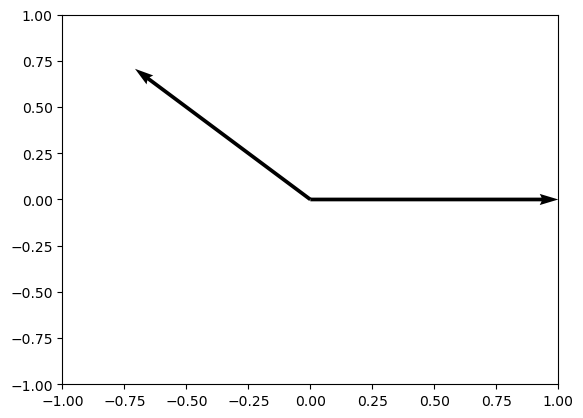

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

alpha = -3*np.pi / 4
G = np.array([
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha), np.cos(alpha)]
])
x = np.array([-1./np.sqrt(2), 1./np.sqrt(2)])
y = G.dot(x)

plt.quiver([0, 0], [0, 0], [x[0], y[0]], [x[1], y[1]], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

## Промежуточный итог

- Матрицы и матричные нормы
- Унитарные (ортогональные) матрицы
- Примеры унитарных матриц: матрицы отражений (Хаусхолдера) и поворота (Гивенса)